# Initialization

## Inport modules

In [2]:
import pyvisa

# Create a ResourceManager object
rm = pyvisa.ResourceManager()

# List all connected instruments
instruments = rm.list_resources()

# Print the list of instruments
print("Connected instruments:", instruments)

# Query and print the IDN of each instrument
for instrument in instruments:
    try:
        with rm.open_resource(instrument) as inst:
            idn = inst.query("*IDN?")
            print(f"Instrument at {instrument}: {idn}")
    except Exception as e:
        print(f"Could not query instrument at {instrument}: {e}")

Connected instruments: ('TCPIP0::K-E5080B-02870::inst0::INSTR', 'TCPIP0::K-E5080B-02870.local::hislip0::INSTR', 'TCPIP0::K-E5080B-02870.local::inst0::INSTR', 'ASRL1::INSTR', 'ASRL3::INSTR', 'GPIB0::7::INSTR')
Instrument at TCPIP0::K-E5080B-02870::inst0::INSTR: Keysight Technologies,E5080B,MY59202870,A.15.10.08

Instrument at TCPIP0::K-E5080B-02870.local::hislip0::INSTR: Keysight Technologies,E5080B,MY59202870,A.15.10.08

Instrument at TCPIP0::K-E5080B-02870.local::inst0::INSTR: Keysight Technologies,E5080B,MY59202870,A.15.10.08

Could not query instrument at ASRL1::INSTR: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Could not query instrument at ASRL3::INSTR: VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.
Instrument at GPIB0::7::INSTR: KEITHLEY INSTRUMENTS,MODEL DMM6500,04518181,1.7.7b



In [2]:
from qcodes_contrib_drivers.drivers.QuTech.IVVI import IVVI
from qcodes import Station

# 初始化 IVVI 儀器
ivvi = IVVI('ivvi', 'ASRL3::INSTR')

# 創建測試站並添加 IVVI 儀器
station = Station()
station.add_component(ivvi)

AttributeError: module 'qcodes' has no attribute 'config'

In [1]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint
from tqdm.notebook import tqdm

from time import sleep, monotonic, time


import qcodes as qc
from qcodes import Parameter

from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes.utils.metadata import diff_param_values

from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes.dataset.measurements import Measurement

# sys.path.append('M:\\tnw\\ns\\qt\\2D Topo\\code\\qcodes')
sys.path.append('C:\\qcodes')
from sweeps import do1d, do2d, time_sweep, measure_until, do1d_until
from sweeps_Christian import do1d_repeat

import warnings
warnings.filterwarnings('ignore')

In [2]:
fridge_name = 'BF1'

# %run ..\..\..\..\..\code\qcodes\init_fridge.py {fridge_name}
%run ..\..\..\init_fridge.py {fridge_name}
#確保沒有其他有跟ivvi有關的notebook在run,不然會有bug

Initialized IVVI-rack in 0.05s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04518181, firmware:1.7.7b) in 0.09s
Connected to: Stanford_Research_Systems SR860 (serial:004608, firmware:V1.51) in 0.04s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-114, firmware:3.15) in 1.04s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-113, firmware:3.15) in 1.15s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-111, firmware:3.15) in 1.11s


In [3]:
snapshot_of_station = station.snapshot()
pprint(snapshot_of_station)

{'components': {},
 'config': None,
 'instruments': {'AMI430_3D': {'__class__': 'qcodes.instrument_drivers.american_magnetics.AMI430.AMI430_3D',
                               'functions': {},
                               'label': 'AMI430_3D',
                               'name': 'AMI430_3D',
                               'parameters': {'IDN': {'__class__': 'qcodes.parameters.parameter.Parameter',
                                                      'full_name': 'AMI430_3D_IDN',
                                                      'instrument': 'qcodes.instrument_drivers.american_magnetics.AMI430.AMI430_3D',
                                                      'instrument_name': 'AMI430_3D',
                                                      'inter_delay': 0,
                                                      'label': 'IDN',
                                                      'name': 'IDN',
                                                      'post_delay': 0,
         

## IVVI sensitive check

In [4]:
ivvi.dac1.step = 100
ivvi.dac1.inter_delay = 0.01
ivvi.dac2.step = 100
ivvi.dac2.inter_delay = 0.01
ivvi.dac3.step = 5
ivvi.dac3.inter_delay = 0.1

In [5]:
ivvi.dac5.step = 10
ivvi.dac5.inter_delay = 0.1
ivvi.dac5(0)

##  DC K213 sensitive check

In [ ]:
keithley_2.averaging_enabled(False)

In [ ]:
magnet_y.current_limit()

In [ ]:
K213.voltage1(0)
K213.voltage2(0)
K213.voltage3(0)
K213.voltage4(0)
#you can choose the DAC range by setting to a specific value
K213.vrange1(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange2(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange3(3) #0(0V), 1(1V), 2(5V), 3(10V)
K213.vrange4(3) #0(0V), 1(1V), 2(5V), 3(10V)

In [ ]:
K213.voltage1(1e-3)

## DC 2440 sensitive check

In [ ]:
keithley_24.mode()

In [ ]:
keithley_24.output(1) # output on
keithley_24.rangev(40)
keithley_24.volt(0)
keithley_24.compliancei(100e-3)
# keithley_24.output(0) #output off
sleep(1)
v_read=keithley_2.amplitude()
print(v_read)

In [ ]:
keithley_24.volt(0)
keithley_24.output(0) #output off

In [ ]:
keithley_24.rangev(40)
keithley_24.rangev()

## TG 2400 sensitive check

In [ ]:
keithley_19.output(1) # output on
keithley_19.rangev(22)
keithley_19.volt(0)
keithley_19.compliancei(100e-6)
# keithley_24.output(0) #output off
sleep(1)
v_read=keithley_2.amplitude()
print(v_read)

In [ ]:
#keithley_19.volt(0)
keithley_19.output(0) #output off

In [ ]:
keithley_19.rangev(22)
keithley_19.rangev()

## Lockin SR860 sensitive check

In [ ]:
lockin1.time_constant(30e-3)
lockin1.frequency(19.3649)
lockin1.input_range(300e-3)
lockin1.sensitivity(2e-3)

##  Database initialisation

In [6]:
reuse = True
%run ..\..\..\init_database.py {reuse}

Creating a new database file:
D:\data\Kay\PtTe2_B707_2nd\PtTe2_B707_2nd_2024-10-19_01.db



# Scaled parameters

In [7]:
from qcodes import ManualParameter, ScaledParameter

## Defining scaled parameters

### 2440 version

In [ ]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments

# Irange_division = Parameter('Irange_division', 
#                             label='scaled current range', unit='', 
#                             set_cmd=None, get_cmd=lambda : 100 / Irange())

Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 100 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1 / TGrange())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1000 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1000 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)

### lockin version

In [ ]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments

# Irange_division = Parameter('Irange_division', 
#                             label='scaled current range', unit='', 
#                             set_cmd=None, get_cmd=lambda : 100 / Irange())

Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1 / TGrange())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)

### IVVI version

In [8]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)
TGrange2 = Parameter('TGrange2', label='Top gate range2', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments

Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1000 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1000 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1000 / TGrange())

TGrange_division2 = Parameter('TGrange_division2', 
                             label='scaled Top gate range2', unit='', 
                             set_cmd=None, get_cmd=lambda : 1000 / TGrange2())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 100 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 100 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)
station.add_component(TGrange2)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)
station.add_component(TGrange_division2)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)


'Gain_L2'

## Parameters - update here during measuerements

### 2400 or 2440 version

In [ ]:
Irange.set(1e-6)
Vrange.set(10) ## need to be sync with K213 range
TGrange.set()
Gain_K1.set(100)
Gain_K2.set(100)
# Gain_K3.set(1e2)
Gain_L1.set(Gain_K1())
Gain_L2.set(Gain_K2())
#division parameters are updated automatically

In [ ]:
keithley_24.nplcv

### IVVI version

In [42]:
Irange.set(1e-6)
Vrange.set(1e-3)
TGrange.set(15)
TGrange2.set(15)
Gain_K1.set(100)
Gain_K2.set(100)
# Gain_K3.set(1e2)
Gain_L1.set(Gain_K1())
Gain_L2.set(Gain_K2())

#division parameters are updated automatically

## DC parameters

### 2440 version

In [ ]:
# appl_current = ScaledParameter(ivvi.dac1, division = Irange_division, name = 'appl_current', unit = 'A')
appl_current = ScaledParameter(keithley_24.volt, division = Irange_division, name = 'appl_current', unit = 'A')
# for K213
# appl_current = ScaledParameter(K213.voltage1, division = Irange_division, name = 'appl_current', unit = 'A')
# appl_voltage = ScaledParameter(K213.voltage2, division = Vrange_division, name = 'appl_voltage', unit = 'V')
#appl_TG = ScaledParameter(keithley_19.volt, division = TGrange_division, name = 'appl_TG', unit = 'V')

# meas_voltage_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_voltage_K1', unit = 'V')
meas_voltage_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_voltage_K2', unit = 'V')

meas_leakage = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')

# meas_current_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_current_K1', unit = 'A')
meas_current_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')

station.add_component(appl_current)
# station.add_component(appl_voltage)
#station.add_component(appl_TG)
# station.add_component(meas_voltage_K1)
station.add_component(meas_voltage_K2)
station.add_component(meas_leakage)
# station.add_component(meas_current_K1)
station.add_component(meas_current_K2)

### lockin version

In [ ]:
# appl_current = ScaledParameter(ivvi.dac1, division = Irange_division, name = 'appl_current', unit = 'A')
appl_current = ScaledParameter(lockin1.sine_outdc, division = Irange_division, name = 'appl_current', unit = 'A')
# for K213
# appl_current = ScaledParameter(K213.voltage1, division = Irange_division, name = 'appl_current', unit = 'A')
# appl_voltage = ScaledParameter(K213.voltage2, division = Vrange_division, name = 'appl_voltage', unit = 'V')
#appl_TG = ScaledParameter(keithley_19.volt, division = TGrange_division, name = 'appl_TG', unit = 'V')

# meas_voltage_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_voltage_K1', unit = 'V')
meas_voltage_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_voltage_K2', unit = 'V')

meas_leakage = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')

# meas_current_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_current_K1', unit = 'A')
meas_current_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')

station.add_component(appl_current)
# station.add_component(appl_voltage)
#station.add_component(appl_TG)
# station.add_component(meas_voltage_K1)
station.add_component(meas_voltage_K2)
station.add_component(meas_leakage)
# station.add_component(meas_current_K1)
station.add_component(meas_current_K2)

In [ ]:
keithley_24.output(0)
appl_current(0.0e-6)
sleep(1)
# meas_voltage_K2()

### IVVI version

In [10]:
appl_current = ScaledParameter(ivvi.dac1, division = Irange_division, name = 'appl_current', unit = 'A')
appl_voltage = ScaledParameter(ivvi.dac2, division = Vrange_division, name = 'appl_voltage', unit = 'V')
appl_TG = ScaledParameter(ivvi.dac3, division = TGrange_division, name = 'appl_TG', unit = 'V')
appl_TG2 = ScaledParameter(ivvi.dac4, division = TGrange_division, name = 'appl_TG2', unit = 'V')

appl_TG7 = ScaledParameter(ivvi.dac7, division = TGrange_division2, name = 'appl_TG7', unit = 'V')
appl_TG9 = ScaledParameter(ivvi.dac9, division = TGrange_division2, name = 'appl_TG9', unit = 'V')
appl_TG11 = ScaledParameter(ivvi.dac11, division = TGrange_division2, name = 'appl_TG11', unit = 'V')

# meas_voltage_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_voltage_K1', unit = 'V')
meas_voltage_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_voltage_K2', unit = 'V')

# meas_leakage = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')

# meas_current_K1 = ScaledParameter(keithley_1.amplitude, division = Gain_K1, name = 'meas_current_K1', unit = 'A')
meas_current_K2 = ScaledParameter(keithley_2.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')

station.add_component(appl_current)
station.add_component(appl_voltage)
station.add_component(appl_TG)
station.add_component(appl_TG2)
station.add_component(appl_TG7)
station.add_component(appl_TG9)
station.add_component(appl_TG11)
# station.add_component(meas_voltage_K1)
station.add_component(meas_voltage_K2)
# station.add_component(meas_leakage)
# station.add_component(meas_current_K1)
station.add_component(meas_current_K2)

'meas_current_K2'

In [11]:
ivvi.dac1(1000)

In [12]:
I=1e-6
appl_current(I)
sleep(1)
V=meas_voltage_K2()
R=V/I
print(R)

-0.0033787780000000007


In [13]:
appl_TG()

0.00045777065690003836

##  AC parameters

In [14]:
appl_current_AC = ScaledParameter(lockin1.amplitude, division = Irange_AC_division, name = 'appl_current_AC', unit = 'A')
appl_voltage_AC = ScaledParameter(lockin1.amplitude, division = Vrange_AC_division, name = 'appl_voltage_AC', unit = 'V')

station.add_component(appl_current_AC)
station.add_component(appl_voltage_AC)

meas_voltage_AC_L1 = ScaledParameter(lockin1.X, division = Gain_L1, name = 'meas_voltage_Lockin1', unit = 'V')
meas_current_AC_L1 = ScaledParameter(lockin1.X, division = Gain_L1, name = 'meas_current_Lockin1', unit = 'A')
meas_phase_AC_L1 = ScaledParameter(lockin1.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')


# meas_voltage_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_voltage_Lockin2', unit = 'V')
# meas_current_AC_L2 = ScaledParameter(lockin_2.X, division = Gain_L2, name = 'meas_current_Lockin2', unit = 'A')
# meas_phase_AC_L2 = ScaledParameter(lockin_2.P, division = 1, name = 'meas_phase_Lockin1', unit = 'degree')

station.add_component(meas_voltage_AC_L1)
station.add_component(meas_current_AC_L1)
station.add_component(meas_phase_AC_L1)

# station.add_component(meas_voltage_AC_L2)
# station.add_component(meas_current_AC_L2)

meas_voltage_AC_L1_R = ScaledParameter(lockin1.R, division = Gain_L1, name = 'meas_voltage_R_Lockin1', unit = 'V')
# meas_voltage_AC_L2_R = ScaledParameter(lockin_2.R, division = Gain_L2, name = 'meas_voltage_R_Lockin2', unit = 'V')

station.add_component(meas_voltage_AC_L1_R)
# station.add_component(meas_voltage_AC_L2_R)

'meas_voltage_R_Lockin1'

In [15]:
meas_voltage_AC_L1_P = ScaledParameter(lockin1.P, division = 1, name = 'meas_voltage_Lockin1_P', unit = 'degree')
meas_current_AC_L1_P = ScaledParameter(lockin1.P, division = 1, name = 'meas_current_Lockin1_P', unit = 'degree')

# meas_voltage_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_voltage_Lockin2_P', unit = 'degree')
# meas_current_AC_L2_P = ScaledParameter(lockin_2.P, division = 1, name = 'meas_current_Lockin2_P', unit = 'degree')

station.add_component(meas_voltage_AC_L1_P)
station.add_component(meas_current_AC_L1_P)

# station.add_component(meas_voltage_AC_L2_P)
# station.add_component(meas_current_AC_L2_P)

'meas_current_Lockin1_P'

## Another useful example: magnet using dac (Janis)

>2231.2 G per A => 0.22312 T per A<br>
I source 10mA per V => 1e-5 A per 1mV<br>
result: 0.22312 T/A * 1e-5 A/mV

In [16]:
def get_R_from_IV(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    
    return fit_values[0]

def get_R_from_IV_2(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    return fit_values[0]

# Simple IVs

## w/ 2440

In [ ]:

keithley_2.averaging_count(3)
keithley_2.averaging_enabled(True)


In [ ]:
#keithley_24.output(1)
appl_current(3e-6)

### IV

In [ ]:
keithley_24.output(1)
appl_current(-1e-4)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV', sample_name='ST4_29_30_31_32_100uA By@-10mT')

dataid = do1d(appl_current, -1e-4 ,1e-4, 101, 0.5,meas_voltage_K2,)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)

get_R_from_IV_2(dataid)
keithley_24.output(0)

In [ ]:
runid=39
print(get_R_from_IV_2(runid))

### excess current

## w/ lock-in

### IV

In [ ]:
#keithley_24.output(1)
appl_current(-5e-6)
appl_current_AC(1e-8)
#lockin1.auto_range()


# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='ST4_29_30_31_32')

dataid = do1d(appl_current, -5e-6 ,5e-6, 101, 0.21,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P )
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
 
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid)

In [ ]:
runid=7

print(get_R_from_IV_2(runid))

In [ ]:
appl_current(3e-6)
appl_current_AC(3e-8)

### excess current

In [ ]:
#keithley_24.output(1)
appl_current(-3e-5)
appl_current_AC(4e-8)
lockin1.auto_range()
sleep(2)


# station.snapshot(update=True);
exp = qc.new_experiment('excess current', sample_name='R046_M1_25_26_13_14')

dataid = do1d(appl_current, -3e-6 ,3e-6, 101, 0.21,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P )
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
 
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid)

In [ ]:
keithley_24.compliancei(200e-3)

In [ ]:
runid=4

print(get_R_from_IV_2(runid))

## w/ IVVI

### IV

There is (are) already experiment(s) with the name of IV and sample name of IV_21_20_23_22 in the database.


Starting experimental run with id: 2. 


  0%|          | 0/101 [00:00<?, ?it/s]

Trying to mark a run completed that was already completed.


-0.11779223960396036


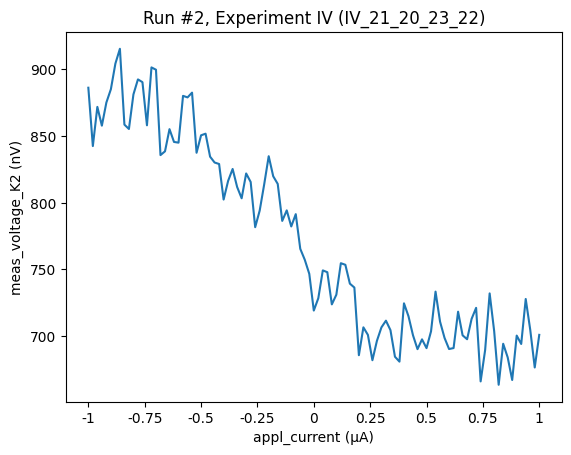

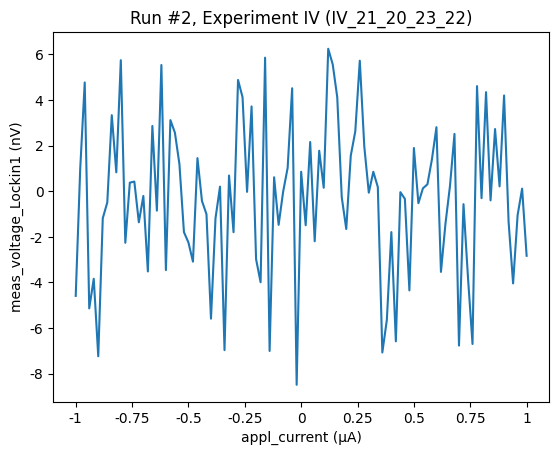

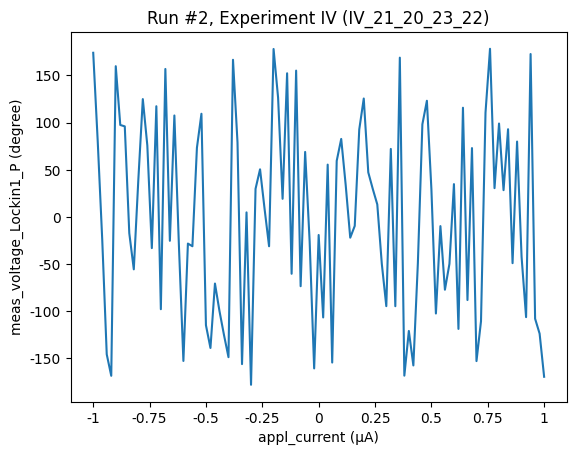

In [20]:
# appl_TG(0.7)
# sleep(10)
appl_current(-1e-6)
appl_current_AC(1e-9)

sleep(5)
# station.snapshot(update=True);
exp = qc.new_experiment('IV', sample_name='IV_21_20_23_22')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -1e-6, 1e-6, 101, 0.5, meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(10e-6)

### excess current

In [ ]:
# appl_TG(0.7)
# sleep(10)
appl_current(-3e-5)
appl_current_AC(3e-8)
sleep(1)
# station.snapshot(update=True);
exp = qc.new_experiment('excess current', sample_name='IV_R046_M2_ME2')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -3e-5 ,3e-5, 801, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# ivvi.set_dacs_zero()


appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

# Gate Sweep

## TG (1D)

In [ ]:
keithley_19.output(0)
appl_TG(0)

In [ ]:
#keithley_19.output(1)
for i in range(5):
    appl_TG(-16-i)
    sleep(1)
#keithley_19.output(0) 

In [ ]:
appl_TG(0)

In [ ]:
#keithley_19.output(1)
#keithley_24.output(1)
appl_TG(-5)
#sleep()
#keithley_24.output(1)
appl_current(1e-6)
#lockin1.auto_range()
#19.7204
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IVg', sample_name='M2_15_16_17_18_TG41')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_TG,-5, -20,200, 0.5, meas_voltage_K2, meas_voltage_AC_L1,meas_voltage_AC_L1_P)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

#keithley_19.output(0)
#keithley_24.output(0)
# appl_current(0)
plot_by_id(dataid)
#print(get_R_from_IV(dataid))
# print(get_R_from_IV_2(dataid))


## 歸零


In [38]:
#keithley_19.output(1)
#keithley_24.output(1)

appl_current(0)
sleep(1)
appl_TG(0)
sleep(5)

#keithley_19.output(0)
#keithley_24.output(0)

# Magnetic field

## Initialization

### sensitive check

In [ ]:
magnet_x.field()


In [25]:
magnet_y.field()

0.008800018

In [ ]:
magnet_z.field()

### ramping

In [ ]:
magnet_x.ramp_rate()

In [ ]:
magnet_y.ramp_rate()

In [ ]:
magnet_z.ramp_rate()

### setting

In [39]:
magnet_x.field(0e-3)
sleep(5)
magnet_y.field(0e-3)
sleep(5)

In [43]:
magnet_y.field(0e-3)
sleep(5)
#magnet_y.field(-5e-3)
#sleep(5)


In [40]:
magnet_z.field(0e-3)
sleep(5)
magnet_z.field(0e-3)
sleep(5)
#magnet_z.field(-40e-3)
#sleep(5)

## Bx

### IV vs Bx

In [ ]:
magnet_y.field()

In [ ]:
appl_current(-10e-6)
appl_current_AC(1e-8)
#lockin1.time_constant(30e-3)
#lockin1.frequency(32.5143)
#lockin1.input_range(300e-3)
#lockin1.sensitivity(2e-3)
sleep(5)
# station.snapshot(update=True);

exp = qc.new_experiment('I vs Bx', sample_name='Bx+,I+_R045SQ1_31_32_33_34')
dataid = do2d(magnet_x.field, -3e-3, 3e-3, 101, 0.2, appl_current, -10e-6 ,10e-6, 101, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# dataid = do1d(appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

appl_current(0)

# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_x.field(-50e-3)
sleep(5)
magnet_x.field(-40e-3)
sleep(5)
#magnet_x.field(20e-3)

### IV w/ Bx

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_x.field(0.23e-3)
appl_current(-0.5e-6)
sleep(10)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_Bx')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -0.5e-6 ,0.5e-6, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

keithley_24.output(0)

## By

### Fraunhofer

#### IV vs By

##### DC_2440/2400 version

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_y.field(-15e-3)
sleep(2)
appl_current(-1.5e-4)

sleep(2)


# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name='By+ SQ1_28_29_30_31')
dataid = do2d(magnet_y.field, -15e-3, -10e-3, 151 , 0.1, appl_current, -1.5e-4 ,1.5e-4, 101, 0.01,meas_voltage_K2)

sleep(5)
appl_current(0)
keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

In [37]:
appl_current(-1.5e-5)
appl_current_AC(0)
#lockin1.time_constant(30e-3)
#lockin1.frequency(32.5143)
#lockin1.input_range(300e-3)
#lockin1.sensitivity(2e-3)
sleep(5)
# station.snapshot(update=True);

exp = qc.new_experiment('I vs By', sample_name='By+,I+_20_21_22_23')
dataid = do2d(magnet_y.field, 2e-3,5e-3, 101, 0.1, appl_current, -1.5e-5, 2e-5, 101, 0.01,meas_voltage_K2)
# dataid = do1d(appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

appl_current(0)

# magnet_y.field(0)

plot_by_id(dataid)

Starting experimental run with id: 13. 


first parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

nested  parameter:   0%|          | 0/101 [00:00<?, ?it/s]

An exception occured in measurement with guid: 853b8db1-0000-0000-0000-0192a576c1a7;
Traceback:
Traceback (most recent call last):
  File "C:\qcodes\sweeps.py", line 49, in do2d
    param_set2.set(set_point2)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\parameters\parameter_base.py", line 623, in set_wrapper
    set_function(raw_val_step, **kwargs)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\parameters\scaled_paramter.py", line 216, in set_raw
    self._wrapped_parameter.set(instrument_value)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\parameters\parameter_base.py", line 623, in set_wrapper
    set_function(raw_val_step, **kwargs)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\parameters\command.py", line 209, in __call__
    return self.exec_function(*args)
  File "C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes_contrib_drivers\drivers\QuTech\

KeyboardInterrupt: 

#### IV vs By w/ different thing

In [ ]:
keithley_24.output(1)
sleep(5)
magnet_y.field(-4e-3)
sleep(5)
#magnet_z.field(-50e-3)
sleep(5)
appl_current(-2e-5)
sleep(2)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name='By B4_42_43_41_40(forward)_161x101_Reset from-5mT')
dataid = do2d(magnet_y.field, -4e-3, 4e-3, 161 , 0.1, appl_current, -2e-5 , 2.5e-5, 101, 0.01, meas_voltage_K2)

appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_y.field(-1.2e-3)
sleep(5)
magnet_y.field(-1e-3)
sleep(5)


appl_current(-2.5e-6)
sleep(2)

exp = qc.new_experiment('IV vs By', sample_name='R026ZZ_16_35_15_14_TG6@4V')
dataid = do2d(magnet_y.field, -1e-3, 1e-3, 301 , 0.1, appl_current, -2.5e-6 , 2.5e-6, 201, 0.01, meas_voltage_K2)

plot_by_id(dataid)
appl_current(0)
sleep(5)




magnet_y.field(-1.2e-3)
sleep(5)
magnet_y.field(-1e-3)
sleep(5)

for i in range(3):
    appl_TG(4-i)
    sleep(1)
appl_current(-2e-6)
sleep(2)

exp = qc.new_experiment('IV vs By', sample_name='R026ZZ_16_35_15_14_TG6@2V')
dataid = do2d(magnet_y.field, -1e-3, 1e-3, 301 , 0.1, appl_current, -2e-6 , 2e-6, 201, 0.01, meas_voltage_K2)

plot_by_id(dataid)
appl_current(0)
sleep(5)





magnet_y.field(-1.2e-3)
sleep(5)
magnet_y.field(-1e-3)
sleep(5)

for i in range(3):
    appl_TG(2-i)
    sleep(1)
appl_current(-1.6e-6)
sleep(2)

exp = qc.new_experiment('IV vs By', sample_name='R026ZZ_16_35_15_14_TG6@0V')
dataid = do2d(magnet_y.field, -1e-3, 1e-3, 301 , 0.1, appl_current, -1.6e-6 , 2e-6, 201, 0.01, meas_voltage_K2)

appl_current(0)
sleep(5)
#keithley_24.output(0)
magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_y.field(0.78e-3)
sleep(5)
magnet_y.field(0.8e-3)
sleep(5)

### Vg w/ By

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
magnet_y.field(-1e-3)
appl_TG(5)
sleep(3)
appl_current(1e-6)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IVg', sample_name='R031_21_20_19_18_TG47_1uA')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_TG,20,-25, 201, 0.5, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

#keithley_19.output(0)
keithley_24.output(0)
appl_current(0)
plot_by_id(dataid)
#print(get_R_from_IV(dataid))
# print(get_R_from_IV_2(dataid))


### By vs Vg (Quantum hall regime)

#### DC+AC

In [ ]:
magnet_x.ramp_rate()

In [ ]:
appl_current(0)
appl_current_AC(3e-9)
lockin1.time_constant(30e-3)
lockin1.frequency(19.3969)
lockin1.input_range(300e-3)
lockin1.sensitivity(2e-3)
sleep(5)
appl_TG(-8)
# magnet_y.field(0)
sleep(10)
# station.snapshot(update=True);

exp = qc.new_experiment('Vg vs By', sample_name='R026ZZ_15_35_16_17_TG6_AC:3nA_0.9to0T')
dataid = do2d(magnet_y.field, 0.9, 0, 90, 2, appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# dataid = do1d(appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

appl_current(0)
keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

#### ONly AC

In [ ]:
#keithley_24.output(1)
appl_current(0)
appl_current_AC(3e-9)
lockin1.time_constant(100e-3)
lockin1.frequency(34.8774)
lockin1.input_range(300e-3)
sleep(2)
appl_TG(-8)
# magnet_y.field(0)
sleep(10)
# station.snapshot(update=True);

exp = qc.new_experiment('Vg vs By', sample_name='R026ZZ_16_35_15_14_TG6_0.5to0.2T_OnlyAC')
dataid = do2d(magnet_y.field, 0.5, 0.2, 150, 3, appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# dataid = do1d(appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

sleep(30)
keithley_19.output(1)
for i in range(13):
    appl_TG(4-i)
    sleep(1)
#keithley_19.output(0) 
sleep(30)
appl_TG(-8)


exp = qc.new_experiment('Vg vs By', sample_name='R026ZZ_16_35_15_14_TG6_0.2to0T_OnlyAC')
dataid = do2d(magnet_y.field, 0.2, 0, 100, 3, appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
# dataid = do1d(appl_TG, -8 ,4, 121, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

appl_current(0)
keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_y.field()

### IV w/ By

In [ ]:
i3d.cylindrical_measured() #'rho', 'phi', 'z'

In [ ]:
i3d.cartesian() #'x', 'y', 'z'

In [ ]:
i3d.spherical() #'r', 'theta', 'phi'

In [ ]:
magnet_phi

In [ ]:
np.arctan(-0.00100074/0.004999662)

### Angle dependent

#### 4 polar

In [ ]:
keithley_24.output(1)

sleep(10)
magnet_x.field(40e-3)
sleep(5)
magnet_z.field(0e-3)
sleep(5)
magnet_y.field(-6e-3)
sleep(5)
magnet_y.field(-5e-3)
sleep(5)
appl_current(-1e-5)
sleep(2)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name='By B4_ST3_Reset from-6mT_R=40mT_360°')
dataid = do2d(magnet_y.field, -5e-3, 1.6e-3, 151, 0.1, appl_current, -1e-5 , 1.5e-5, 111, 0.01, meas_voltage_K2)


appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

#### Rotation

In [ ]:
keithley_24.output(1)

sleep(10)
magnet_x.field(40e-3)
sleep(5)
magnet_z.field(0e-3)
sleep(5)
magnet_y.field(-6e-3)
sleep(5)
magnet_y.field(-5e-3)
sleep(5)
appl_current(-1e-5)
sleep(2)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs By', sample_name='By B4_ST3_Reset from-mT_R=40mT_360°')
dataid = do2d(magnet_y.field, -5e-3, 1.6e-3, 151, 0.1, appl_current, -1e-5 , 1.5e-5, 111, 0.01, meas_voltage_K2)


appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

#### JDE in greatest asymmertric w/ different R

In [ ]:
keithley_24.output(1)

sleep(10)
magnet_x.field(0e-3)
sleep(5)
magnet_z.field(60e-3)
sleep(5)
magnet_y.field(-4e-3)
sleep(5)
magnet_y.field(-3.5e-3)
sleep(5)
appl_current(-2e-5)
sleep(2)

exp = qc.new_experiment('IV vs By', sample_name='By B4_ST2_Reset from-4mT_R=0mT_Is-')
dataid = do2d(magnet_y.field, -3.3e-3, 3e-3, 151, 0.1, appl_current, 2e-5 , 2.5e-5, 111, 0.01, meas_voltage_K2)


appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

### Finite momentum cooper pairing 

In [ ]:
keithley_24.output(1)
magnet_x.field(0.0e-3)
sleep(5)
magnet_z.field(0.0e-3)
sleep(5)
magnet_y.field(-11e-3)
sleep(5)
magnet_y.field(-10e-3)
sleep(5)
appl_current(0.5e-6)
sleep(2)

exp = qc.new_experiment('Bx vs By', sample_name='By+_Bx B4_ST3_cooper pair momentum_0.5uA')
dataid = do2d(magnet_x.field, 0.0e-3, 150e-3, 75, 0.2,magnet_y.field, -10e-3, 3e-3, 61, 0.1, meas_voltage_K2)


appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_z.field(100e-3)
sleep(5)
magnet_z.field(0.0e-3)
sleep(5)


In [ ]:
keithley_24.output(1)
magnet_x.field(0.0e-3)
sleep(5)
magnet_z.field(0.0e-3)
sleep(5)
magnet_y.field(-4e-3)
sleep(5)
magnet_y.field(-3e-3)
sleep(5)
appl_current(2.5e-6)
sleep(2)

exp = qc.new_experiment('Bz vs By', sample_name='By+_Bx B4_ST3_cooper pair momentum_2.5uA')
dataid = do2d(magnet_x.field, 0.0e-3, 150e-3, 75, 0.3,magnet_y.field, -3e-3, 3e-3, 121, 0.1, meas_voltage_K2)


appl_current(0)
sleep(5)
keithley_24.output(0)
#magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_x.field(100e-3)
sleep(5)
magnet_x.field(0.0e-3)
sleep(5)

## IV vs Bz

#### IV vs Bz

In [ ]:
keithley_24.output(1)
sleep(2)
magnet_z.field(-5e-3)
sleep(60)
appl_current(-1e-5)
sleep(5)

# station.snapshot(update=True);

exp = qc.new_experiment('IV vs Bz', sample_name='B4 ST3 IvsBz')

dataid = do2d(magnet_z.field,-5e-3,5e-3, 201 , 2, appl_current, -1e-5 ,1.5e-5, 101, 0.05, meas_voltage_K2)

appl_current(0)

keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
magnet_z.field(-50e-3)
sleep(5)
magnet_z.field(-40e-3)
sleep(5)
#magnet_z.field(-40e-3)
#sleep(5)

### IV w/ Bz

In [ ]:
keithley_24.output(1)
keithley_2.averaging_count(10)
#keithley_2.averaging_enabled(False)

sleep(2)
magnet_z.field(0e-3)
appl_current(-2e-7)
sleep(30)

# station.snapshot(update=True);
exp = qc.new_experiment('I vs V', sample_name='IV_w/_f_Bz@0mT_forward_Avg10')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_current, -2e-7 ,2e-7, 201, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

keithley_24.output(0)

## Temperature dependent

In [ ]:
magnet_x.ramp_rate(0.01)
magnet_y.ramp_rate(0.01)
magnet_z.ramp_rate(0.01)

In [ ]:
#300deg_R20
sleep(100)
magnet_x.field(10e-3)
sleep(5)
magnet_z.field(-17.32e-3) 
sleep(5)
magnet_y.field(-1.2e-3) 
sleep(10)
magnet_y.field(-1e-3) 
sleep(300)

keithley_24.output(1)
#sleep(2)
#magnet_y.field(-1e-3)
#sleep(30)
appl_current(-5e-6)
sleep(2)

# station.snapshot(update=True);

exp = qc.new_experiment('PolarBy_300deg_R20', sample_name='L01_100KOhm_20_21_23_22_700mK_22uW')
dataid = do2d(magnet_y.field, -1e-3, 1e-3, 201 , 2.0, appl_current, -5.0e-6 ,5e-6, 101, 0.01, meas_voltage_K2)

appl_current(0)
keithley_24.output(0)
# magnet_y.field(0)

plot_by_id(dataid)

# Zero everything

In [ ]:
appl_current(0)
#ppl_TG(0)
magnet_y.field(0)
sleep(2)
magnet_x.field(0)
sleep(2)
magnet_z.field(0)
sleep(2)
#appl_voltage_AC(0.004)
#SGS.off()
keithley_24.output(0)
#appl_current_AC(0)
#keithley_19.output(0)

In [ ]:
appl_current(0)

# Gate simple sweeps

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
appl_TG(-40)
sleep(3)
appl_current(1e-7)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV', sample_name='31_30_37)36_TG21')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do1d(appl_TG, -40 ,40, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

keithley_19.output(0)
keithley_24.output(0)
appl_current(0)
plot_by_id(dataid)
#print(get_R_from_IV(dataid))
# print(get_R_from_IV_2(dataid))

## 加TG (2D)

In [ ]:
appl_current(0)
sleep(1)
appl_TG(0)
sleep(5)

In [ ]:
magnet_x.field(-0.044e-3)
sleep(10)
magnet_y.field(-6.016e-3)
sleep(10)

### DC

In [ ]:
keithley_19.output(1)
keithley_24.output(1)
appl_TG(-20)
sleep(5)
appl_current(-1e-7)
sleep(1)

exp = qc.new_experiment('I_vs_Vgate_up', sample_name='R031_21_20_19_18_TG46')
dataid = do2d(appl_TG, -20, 20, 101, 1, appl_current, -1e-7, 1e-7, 101, 0.05, meas_voltage_K2)

#appl_TG(0)
#sleep(5)
appl_current(0e-7)
sleep(5)

#keithley_19.output(0)
keithley_24.output(0)

plot_by_id(dataid)

### DC+AC

In [ ]:
appl_current(-1e-7)
appl_current_AC(1e-9)
#lockin1.time_constant(30e-3)
#lockin1.frequency(19.3969)
#lockin1.input_range(300e-3)
#lockin1.sensitivity(2e-3)
sleep(5)
appl_TG(-20)
# magnet_y.field(0.45)
sleep(10)

# station.snapshot(update=True);

exp = qc.new_experiment('I_vs_Vgate_up', sample_name='R046M2_15_16_17_18')
dataid = do2d(appl_TG, -20, -5, 301, 1, appl_current, -1e-7, 1e-7, 101, 0.5,meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)
#dataid = do1d(appl_current, -1e-6 , 1e-6, 101, 0.5, meas_voltage_K2, meas_voltage_AC_L1, meas_voltage_AC_L1_P)

appl_current(0)

# magnet_y.field(0)

plot_by_id(dataid)

In [ ]:
appl_current(0.5e-6)

# RF

## I vs RF_f

### sensitive check

In [ ]:
SGS.power()
SGS.frequency()

In [ ]:
SGS.on()

In [ ]:
SGS.off()

In [ ]:
magnet_x.field(0.4e-3)
sleep(10)
magnet_y.field(2.53e-3)
sleep(10)

### I vs RF_f (1D)

In [ ]:
SGS.off()
SGS.power(10)
SGS.frequency(4e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)
keithley_19.output(1)
appl_TG(0)

appl_current(0.5e-6)
#appl_TG(10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
exp = qc.new_experiment('I vs RF_f', sample_name='IvsRF_f R026ZZ_18_19_16_17_10dBm,0.5A, Vg:0V')
dataid = do1d(SGS.frequency, 18e9, 18.5e9, 1000, 0.1, meas_voltage_K2)

appl_current(0)
SGS.off()
keithley_24.output(0)
plot_by_id(dataid)

### I vs RF_f (2D)

In [ ]:
SGS.off()
SGS.power(-25)
SGS.frequency(5e9)
SGS.on()

keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)
keithley_19.output(1)
appl_TG(0)

appl_current(-2e-6)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='R026ZZ_18_19_16_17_10dBm_Vg:0V')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 5e9, 10e9, 1000, 0.3, appl_current,-2e-6 ,2e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

sleep(20)

keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


In [ ]:
SGS.off()
SGS.power(5)
SGS.frequency(5.35e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.5e-6)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='IV vs RF_1M_71mK_RF5dbm_3_2_47_46')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 5.35e9, 5.55e9, 1000, 1, appl_current,-1.5e-6 ,4e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(2)
magnet_x.field(0)
sleep(2)
#appl_voltage_AC(0.004)
SGS.off()

In [ ]:
SGS.off()
SGS.power(5)
SGS.frequency(6.28e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.5e-6)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='IV vs RF_1M_71mK_RF5dbm_3_2_47_46')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 6.28e9, 6.33e9, 1000, 1, appl_current,-1.5e-6 ,3.5e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


In [ ]:
SGS.off()
SGS.power(5)
SGS.frequency(6.7e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.5e-6)
#appl_TG(-10)
# magnet_x.field(0.4e-3)
# magnet_y.field(2.53e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='IV vs RF_1M_71mK_RF5dbm_3_2_47_46')

#do1d(param_set, start, stop, num_points, delay, *param_meas)
dataid = do2d(SGS.frequency, 6.7e9, 6.74e9, 1000, 1, appl_current,-1.5e-6 ,3.5e-6, 101, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))


## IV vs RF_f

### Shapiro steps 

In [ ]:
SGS.off()
SGS.power(10)
SGS.frequency(18.4e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-2e-6)
appl_TG(0)
#magnet_x.field(0.23e-3)
#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs RF_f', sample_name='ShapiroSteps_18.4GHz_R026ZZ_18_19_16_17_10dBm_Vg:0V')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do1d(appl_current,-2e-6 ,2e-6, 201, 0.2,  meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(0)
SGS.frequency(3.87e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(False)
keithley_24.output(1)

appl_current(-1.2e-6)
#appl_TG(-10)
magnet_y.field(-10e-3)

#magnet_y.field(1.41e-3)
# sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('Bx vs RF_f', sample_name='By vs RF_f_J2_3.87_-10dB')

#do1d(param_set, start, stop, num_points, delay, *param_meas)""
dataid = do2d(magnet_y.field, -10e-3, 10e-3,701, 1, appl_current,-1.2e-6 ,1.2e-6, 101, 0.05,  meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
keithley_24.output(0)
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
#appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
#appl_voltage_AC(0.004)
SGS.off()

## IV vs Power Dependence

In [ ]:
SGS.off()
SGS.power(-25)
SGS.frequency(4.194e9)
SGS.on()
keithley_2.averaging_count(1)
keithley_2.averaging_enabled(False)
keithley_24.output(1)
appl_TG(0)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-2e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_4.194GHz_R026ZZ_18_19_16_17_Vg:0V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-25, 20, 451, 0.3, appl_current,-2e-6 ,2e-6,201, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, -6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
appl_current(0)
keithley_24.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(-3)
SGS.frequency(5.457e9)
SGS.on()

keithley_24.output(1)

for i in range(5):
    appl_TG(0+i)
    sleep(1)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-2e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_5.457GHz_R026ZZ_16_35_15_14_Vg:4V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-3, 20, 461, 0.3, appl_current,-2e-6 ,2e-6,201, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
plot_by_id(dataid)
sleep(180)




for i in range(3):
    appl_TG(4-i)
    sleep(1)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-2.5e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_5.457GHz_R026ZZ_16_35_15_14_Vg:2V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-3, 20, 461, 0.3, appl_current,-2e-6 ,2e-6,201, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
plot_by_id(dataid)
sleep(180)






for i in range(5):
    appl_TG(2-i)
    sleep(1)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1.5e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_5.457GHz_R026ZZ_16_35_15_14_Vg:-2V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-3, 20, 461, 0.3, appl_current,-1.5e-6 ,1.5e-6,201, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
plot_by_id(dataid)
sleep(180)






for i in range(3):
    appl_TG(-2-i)
    sleep(1)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_5.457GHz_R026ZZ_16_35_15_14_Vg:-4V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-3, 20, 461, 0.3, appl_current,-1e-6 ,1e-6,201, 0.01, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
plot_by_id(dataid)
sleep(180)





for i in range(3):
    appl_TG(-4-i)
    sleep(1)

#magnet_x.field(15e-3)
#sleep(5)
appl_current(-1e-6)
#appl_TG(0)
sleep(5)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='PD_5.457GHz_R026ZZ_16_35_15_14_Vg:-6V')

#do1d(param_set, start, stop, num_points, delay, *pram_meas)

dataid = do2d(SGS.power,-3, 20, 461, 0.3, appl_current,-1e-6 ,1e-6,201, 151, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
sleep(180)


SGS.off()
appl_current(0)
keithley_24.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

In [ ]:
SGS.off()
SGS.power(-25)
SGS.frequency(5.226e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

magnet_y.field(-8e-3)
sleep(60)
appl_current(-2e-7)
#appl_TG(-30)
sleep(2)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_5.226_By:-8mT')

#do1d(param_set, start, stop, num_points, delay, *param_meas)

dataid = do2d(SGS.power,-25, 10, 101, 20, appl_current,-2e-7 ,2e-7, 101, 0.05, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()

SGS.off()
appl_current(0)
keithley_24.output()
plot_by_id(dataid)

# print(get_R_from_IV(dataid))
print(get_R_from_IV_2(dataid))

### PD vs frequency_IV loop (not yet)

In [ ]:
frequencies = [3.248, 3.387, 5.677]
power_levels = [-20, 0, 25]
     
SGS.off()
SGS.power(-20)
SGS.frequency(3.387e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
keithley_24.output(1)

appl_current(-2e-6)
#appl_TG(-10)
sleep(1)

for freq in frequencies:
    SGS.frequency(freq)
    for power_level in power_levels:
        SGS.power(power_level)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs power dependence', sample_name='IV vs PD_J2_3.387_m20')
dataid = do2d(SGS.power, 4, 8, 100, 2, appl_current, -1e-6, 1e-6, 101, 0.05, meas_voltage_K2)

 # 關閉設備，並在需要時列印或繪製結果
SGS.off()
appl_current(0)
keithley_24.output()
plot_by_id(dataid)
    
print(f"頻率：{freq} Hz，功率水平：{power_level} dB")
print(get_R_from_IV_2(dataid))


## IV vs Vgate

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
SGS.off()
SGS.power(25)
SGS.frequency(4.83e9)
SGS.on()
keithley_2.averaging_count(5)
keithley_2.averaging_enabled(True)
appl_current(-0.4e-7)
appl_current_AC(0.1e-10)

appl_TG(-10)
sleep(1)

# station.snapshot(update=True);
exp = qc.new_experiment('IV vs Vgate', sample_name='IV vs Vg')

dataid = do2d(appl_TG, -10, 10, 751, 0.5, appl_current, -0.4e-7, 0.4e-7, 101, 0.01, meas_voltage_AC_L1, meas_voltage_AC_L1_P, meas_voltage_K2)
# dataid = do1d(appl_current, 6e-6 , -6e-6, 251, 0.01, meas_voltage_K1)
# ivvi.set_dacs_zero()
SGS.off()
appl_current(0)
plot_by_id(dataid)
# print(get_R_from_IV(dataid))
#print(get_R_from_IV_2(dataid))

In [ ]:
appl_current(0)
appl_TG(0)
magnet_y.field(0)
sleep(10)
magnet_x.field(0)
sleep(10)
appl_voltage_AC(0.004)
SGS.off()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
k = 8.617333262145e-5  # Boltzmann constant in eV/K
E_a = 0.5  # Example value for the activation energy in eV
p_0 = 1.0  # Example value for p0

# Create an array of temperatures from 100 to 1000 K
temperatures = np.linspace(100, 1000, 50)

# Calculate 1/T
inverse_temperatures = 1 / temperatures

# Calculate ln(p)
ln_p = np.log(p_0) - (E_a / k) * inverse_temperatures

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(inverse_temperatures, ln_p, marker='o', linestyle='-')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(p)')
plt.title('ln(p) vs 1/T for Hole Concentration')
plt.grid(True)
plt.show()
